#  Gathering Data

In [1]:
import tweepy

consumer_key = 'HIDDEN KEYS'
consumer_secret = 'HIDDEN KEYS'
access_token = 'HIDDEN KEYS'
access_secret = 'HIDDEN KEYS'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)



In [7]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import json
import requests

In [3]:
df = pd.read_csv('twitter-archive-enhanced-2.csv')

In [4]:
missing_tweet_id = []
data = []
for i in range(len(df['tweet_id'])):
    try:
        tweet = api.get_status(df.iloc[i,0],tweet_mode='extended')
        data.append(tweet._json)
    except:
        print(df.iloc[i,0])
        missing_tweet_id.append(df.iloc[i,0])

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
845459076796616705
844704788403113984
842892208864923648
837012587749474308
827228250799742977
812747805718642688
802247111496568832
775096608509886464
770743923962707968
Rate limit reached. Sleeping for: 721
754011816964026368
680055455951884288
Rate limit reached. Sleeping for: 721


In [5]:
with open('tweet_json.txt',mode='w') as f:
        json.dump(data, f)

In [4]:
twitter_additional_archive=pd.read_json('tweet_json.txt')

In [8]:
predictions = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
with open('predictions.tsv',mode='wb') as p:
     p.write(predictions.content)

In [6]:
i_predictions = pd.read_csv('predictions.tsv', sep='\t')

# Assesment of data

In [175]:
#Tidy Issue 1: Removing unnecessary columns
#Tidy Issue 2: Data needs joining into one master file 

In [10]:
df.info()
#Quality Issue 1: Noticed that tweet_id is a integar but twitter recommends it to be a string 
#Quality Issue 2: retweet_status_id is a 181 and so those data points must be removed
#Quality Issue 3: Once retweeted rows are removed, retweet_status_id, retweeted_status_user_id and 
                #retweeted_status_timestamp are obsolete and should be removed. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter_additional_archive.info()
#Quality Issue 4: retweet_status_id is a 166 and so those data points must be removed
#Quality Issue 5: Once retweeted rows are removed, retweet status id and retweeted are obsolete and should be removed.
#Quality Issue 6: Noticed that id is a integar but twitter recommends it to be a string 
#Quality Issue 7: id_str is the same as id and should be removed.  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2337 entries, 0 to 2336
Data columns (total 32 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2337 non-null datetime64[ns]
display_text_range               2337 non-null object
entities                         2337 non-null object
extended_entities                2065 non-null object
favorite_count                   2337 non-null int64
favorited                        2337 non-null bool
full_text                        2337 non-null object
geo                              0 non-null float64
id                               2337 non-null int64
id_str                           2337 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 n

In [12]:
i_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [13]:
i_predictions['p1_dog'].value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [14]:
i_predictions['p2_dog'].value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [15]:
i_predictions['p3_dog'].value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

In [16]:
#Quality Issue number 8: P1 is the most likely prediction for what breed (if any) a dog maybe. 
#Therefore any false rows can be removed 

In [17]:
#checking for duplicates in twitter archive 
df[df['tweet_id'].duplicated()].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

In [18]:
#Checking for duplicates in the additional archive 
twitter_additional_archive[twitter_additional_archive['id'].duplicated()].count()

contributors                     0
coordinates                      0
created_at                       0
display_text_range               0
entities                         0
extended_entities                0
favorite_count                   0
favorited                        0
full_text                        0
geo                              0
id                               0
id_str                           0
in_reply_to_screen_name          0
in_reply_to_status_id            0
in_reply_to_status_id_str        0
in_reply_to_user_id              0
in_reply_to_user_id_str          0
is_quote_status                  0
lang                             0
place                            0
possibly_sensitive               0
possibly_sensitive_appealable    0
quoted_status                    0
quoted_status_id                 0
quoted_status_id_str             0
quoted_status_permalink          0
retweet_count                    0
retweeted                        0
retweeted_status    

In [19]:
#Checking for duplcaites in Predictions.  
i_predictions[i_predictions['tweet_id'].duplicated()].count()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [20]:
missing_values = df['tweet_id'].isnull().values 
for i in range(len(df['tweet_id'])):
    if missing_values[i] == True:
        i
#Since nothing was out put there is no missing data

In [21]:
df['rating_numerator'].value_counts()
#Most ratings are between 12 and 13 however some ratings do not follow the 
#weratedogs rating system since they are below 10 on the other hand some 
#rating are significantly high. Further investigation is required on thier 
#legitimacy before they are removed.    

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [22]:
df['name'].value_counts()
#Some of the names are errors, where they may be only one letter or words 
#like 'the'.

None          745
a              55
Charlie        12
Cooper         11
Oliver         11
Lucy           11
Tucker         10
Lola           10
Penny          10
Winston         9
Bo              9
Sadie           8
the             8
Bailey          7
Daisy           7
an              7
Toby            7
Buddy           7
Rusty           6
Dave            6
Oscar           6
Bella           6
Scout           6
Jax             6
Stanley         6
Jack            6
Milo            6
Leo             6
Koda            6
Phil            5
             ... 
Kara            1
Lacy            1
Iggy            1
Roscoe          1
DayZ            1
Brandonald      1
Mosby           1
Cal             1
Ole             1
Chadrick        1
Lillie          1
Superpup        1
Stuart          1
Gordon          1
Sprout          1
Spencer         1
Tassy           1
Major           1
Dunkin          1
Combo           1
Nimbus          1
Dwight          1
Tess            1
Eleanor         1
Tessa     

# Cleaning 

**Quality Issue 1: Noticed that tweet_id is a integar but twitter recommneds it to be a string** 

In [23]:
df_copy = df

In [24]:
#df['tweet_id'] = df['tweet_id'].apply(str)
df_copy.tweet_id = df_copy.tweet_id.astype(str)
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null object
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(2), o

In [25]:
x = df_copy.iloc[0,0]
type(x)

str

**Quality Issue 2: retweet_status_id is a 181 and so those data points must be removed**

In [26]:
df_copy.retweeted_status_id = df_copy.retweeted_status_id.fillna(0)
a =df_copy.index[df_copy['retweeted_status_id'] > 0] 
df_copy = df_copy.drop(df_copy.index[a])
df_copy.shape

(2175, 17)

**Quality Issue 3: Once retweeted rows are removed, retweeted_status_id, retweeted_status_user_id and 
retweeted_status_timestamp are obsolete and should be removed.** 

In [27]:
df_copy =df_copy.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)
df_copy.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


**Quality Issue 4: retweet_status_id is a 166 and so those data points must be removed**

In [28]:
twitter_additional_archive_copy =twitter_additional_archive

In [29]:
twitter_additional_archive_copy.retweeted_status = twitter_additional_archive_copy.retweeted_status.fillna(0)
b =twitter_additional_archive_copy.index[twitter_additional_archive_copy['retweeted_status'] != 0] 
twitter_additional_archive_copy = twitter_additional_archive_copy.drop(twitter_additional_archive_copy.index[b])
twitter_additional_archive_copy.shape

(2171, 32)

**Quality Issue 5: Once retweeted rows are removed, retweet status id and retweeted are obsolete and should be removed.** 

In [30]:
twitter_additional_archive_copy =twitter_additional_archive_copy.drop(['retweeted_status', 'retweeted'], axis=1)

In [31]:
twitter_additional_archive_copy.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,quoted_status_permalink,retweet_count,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",37500,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,8174,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",32245,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,6050,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",24288,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,4000,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",40822,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,8325,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",39048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,0.0,NaN,NaN,NaN,NaN,9018,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


**Quality Issue 6: Noticed that id is a integar but twitter recommneds it to be a string** 

In [32]:
twitter_additional_archive_copy.id = twitter_additional_archive_copy.id.astype(str)
twitter_additional_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2336
Data columns (total 30 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2171 non-null datetime64[ns]
display_text_range               2171 non-null object
entities                         2171 non-null object
extended_entities                1990 non-null object
favorite_count                   2171 non-null int64
favorited                        2171 non-null bool
full_text                        2171 non-null object
geo                              0 non-null float64
id                               2171 non-null object
id_str                           2171 non-null int64
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 

**Quality Issue 7: id_str is the same as id and so should be removed.** 

In [33]:
twitter_additional_archive_copy =twitter_additional_archive_copy.drop(['id_str'], axis=1)

In [34]:
twitter_additional_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2336
Data columns (total 29 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2171 non-null datetime64[ns]
display_text_range               2171 non-null object
entities                         2171 non-null object
extended_entities                1990 non-null object
favorite_count                   2171 non-null int64
favorited                        2171 non-null bool
full_text                        2171 non-null object
geo                              0 non-null float64
id                               2171 non-null object
in_reply_to_screen_name          77 non-null object
in_reply_to_status_id            77 non-null float64
in_reply_to_status_id_str        77 non-null float64
in_reply_to_user_id              77 non-null float64
in_reply_to_user_id_str          77 non-null float64
is_quote_status                  217

**Quality Issue number 8: P1 is the most likely prediction for what breed (if any) a dog maybe. 
Therefore any false rows can be removed**

In [35]:
i_predictions_copy = i_predictions 

In [36]:
c =i_predictions_copy.index[i_predictions_copy['p1_dog'] == False] 
i_predictions_copy = i_predictions_copy.drop(i_predictions_copy.index[c])
i_predictions_copy.shape

(1532, 12)

# Tidying  

**Tidying item 1: Remove unnecessary columns**

In [37]:
df_copy = df_copy.drop(['in_reply_to_status_id','in_reply_to_user_id'],axis=1)

In [38]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2175 non-null object
timestamp             2175 non-null object
source                2175 non-null object
text                  2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(2), object(10)
memory usage: 220.9+ KB


In [39]:
twitter_additional_archive_copy = twitter_additional_archive_copy.drop(['contributors','coordinates','display_text_range',
                                                                        'extended_entities','full_text','geo','in_reply_to_screen_name',
                                                                        'in_reply_to_status_id','in_reply_to_status_id_str','in_reply_to_user_id',
                                                                        'in_reply_to_user_id_str','place','quoted_status','quoted_status_id',
                                                                        'quoted_status_id_str','quoted_status_permalink'],axis=1)

In [40]:
twitter_additional_archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2171 entries, 0 to 2336
Data columns (total 13 columns):
created_at                       2171 non-null datetime64[ns]
entities                         2171 non-null object
favorite_count                   2171 non-null int64
favorited                        2171 non-null bool
id                               2171 non-null object
is_quote_status                  2171 non-null bool
lang                             2171 non-null object
possibly_sensitive               2113 non-null float64
possibly_sensitive_appealable    2113 non-null float64
retweet_count                    2171 non-null int64
source                           2171 non-null object
truncated                        2171 non-null bool
user                             2171 non-null object
dtypes: bool(3), datetime64[ns](1), float64(2), int64(2), object(5)
memory usage: 192.9+ KB


In [41]:
i_predictions_copy = i_predictions_copy.drop(['img_num'],axis=1)

In [42]:
i_predictions_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1532 entries, 0 to 2073
Data columns (total 11 columns):
tweet_id    1532 non-null int64
jpg_url     1532 non-null object
p1          1532 non-null object
p1_conf     1532 non-null float64
p1_dog      1532 non-null bool
p2          1532 non-null object
p2_conf     1532 non-null float64
p2_dog      1532 non-null bool
p3          1532 non-null object
p3_conf     1532 non-null float64
p3_dog      1532 non-null bool
dtypes: bool(3), float64(3), int64(1), object(4)
memory usage: 112.2+ KB


**Tidying item 2:Joining data**

In [43]:
df_copy['created_at'],df_copy['favorite_count'],df_copy['favorited'],df_copy['is_quote_status'],df_copy['lang']= ["","","","",""]
df_copy['possibly_sensitive'],df_copy['possibly_sensitive_appealable'],df_copy['retweet_count'], df_copy['truncated']= ["","","",""]
df_copy['jpg_url'],df_copy['p1'],df_copy['p1_conf'],df_copy['p1_dog']= ["","","",""]
df_copy['p2'],df_copy['p2_conf'],df_copy['p2_dog'],df_copy['p3'],df_copy['p3_conf'],df_copy['p3_dog']= ["","","","","",""]

In [44]:
df_copy.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,...,jpg_url,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,...,,,,,,,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,...,,,,,,,,,,


In [45]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 31 columns):
tweet_id                         2175 non-null object
timestamp                        2175 non-null object
source                           2175 non-null object
text                             2175 non-null object
expanded_urls                    2117 non-null object
rating_numerator                 2175 non-null int64
rating_denominator               2175 non-null int64
name                             2175 non-null object
doggo                            2175 non-null object
floofer                          2175 non-null object
pupper                           2175 non-null object
puppo                            2175 non-null object
created_at                       2175 non-null object
favorite_count                   2175 non-null object
favorited                        2175 non-null object
is_quote_status                  2175 non-null object
lang                           

In [46]:
df_copy = df_copy.reset_index(drop=True)
df_copy.shape

(2175, 31)

In [47]:
missing_id = []
missing_id_index = []
for i in range(len(df_copy['tweet_id'])):
    try:
        y=twitter_additional_archive_copy.loc[twitter_additional_archive_copy['id'] == df_copy.tweet_id[i]].index
        df_copy.iloc[i,12]= twitter_additional_archive_copy.created_at[y[0]]
        df_copy.iloc[i,13]= twitter_additional_archive_copy.favorite_count[y[0]]
        df_copy.iloc[i,14]= twitter_additional_archive_copy.favorited[y[0]]
        df_copy.iloc[i,15]= twitter_additional_archive_copy.is_quote_status[y[0]]
        df_copy.iloc[i,16]= twitter_additional_archive_copy.lang[y[0]]
        df_copy.iloc[i,17]= twitter_additional_archive_copy.possibly_sensitive[y[0]]
        df_copy.iloc[i,18]= twitter_additional_archive_copy.possibly_sensitive_appealable[y[0]]
        df_copy.iloc[i,19]= twitter_additional_archive_copy.retweet_count[y[0]]
        df_copy.iloc[i,20]= twitter_additional_archive_copy.truncated[y[0]]
        
        df_copy.iloc[i,21]= i_predictions_copy.jpg_url[y[0]]
        df_copy.iloc[i,22]= i_predictions_copy.p1[y[0]]
        df_copy.iloc[i,23]= i_predictions_copy.p1_conf[y[0]]
        df_copy.iloc[i,24]= i_predictions_copy.p1_dog[y[0]]
        df_copy.iloc[i,25]= i_predictions_copy.p2[y[0]]
        df_copy.iloc[i,26]= i_predictions_copy.p2_conf[y[0]]
        df_copy.iloc[i,27]= i_predictions_copy.p2_dog[y[0]]
        df_copy.iloc[i,28]= i_predictions_copy.p3[y[0]]
        df_copy.iloc[i,29]= i_predictions_copy.p3_conf[y[0]]
        df_copy.iloc[i,30]= i_predictions_copy.p3_dog[y[0]]
    except:
        missing_id.append(df_copy.tweet_id[i])
        missing_id_index.append(i)
        print(df_copy.tweet_id[i])

890971913173991426
890609185150312448
888804989199671297
888554962724278272
887517139158093824
887473957103951883
886983233522544640
886267009285017600
885528943205470208
883838122936631299
883360690899218434
882268110199369728
882045870035918850
881906580714921986
881666595344535552
881268444196462592
879008229531029506
877556246731214848
875097192612077568
874012996292530176
873580283840344065
873213775632977920
872820683541237760
872486979161796608
872261713294495745
871762521631449091
871102520638267392
871032628920680449
870804317367881728
870308999962521604
870063196459192321
869702957897576449
869227993411051520
868880397819494401
867774946302451713
867051520902168576
866334964761202691
865718153858494464
865359393868664832
863427515083354112
863079547188785154
862831371563274240
861288531465048066
861005113778896900
859074603037188101
858471635011153920
858107933456039936
857989990357356544
857393404942143489
857263160327368704
857029823797047296
856282028240666624
855857698524

In [48]:
df_copy=df_copy.drop(missing_id_index, axis=0) 

In [49]:
#reindex
df_copy = df_copy.reset_index(drop=True)

In [50]:
df_copy['favorite_count'] = df_copy['favorite_count'].astype(int)
df_copy['favorited'] = df_copy['favorited'].astype('bool')
df_copy['is_quote_status'] = df_copy['is_quote_status'].astype('bool')
df_copy['possibly_sensitive'] = df_copy['possibly_sensitive'].astype(float)
df_copy['possibly_sensitive_appealable'] = df_copy['possibly_sensitive_appealable'].astype('float')
df_copy['retweet_count'] = df_copy['retweet_count'].astype(int)
df_copy['truncated'] = df_copy['truncated'].astype('bool')

df_copy['p1_conf'] = df_copy['p1_conf'].astype(float)
df_copy['p1_dog'] = df_copy['p1_dog'].astype('bool')
df_copy['p2_conf'] = df_copy['p2_conf'].astype(float)
df_copy['p2_dog'] = df_copy['p2_dog'].astype('bool')
df_copy['p3_conf'] = df_copy['p3_conf'].astype(float)
df_copy['p3_dog'] = df_copy['p3_dog'].astype('bool')

# Storing, Analyzing, and Visualizing

## **Storing**

In [51]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1417 entries, 0 to 1416
Data columns (total 31 columns):
tweet_id                         1417 non-null object
timestamp                        1417 non-null object
source                           1417 non-null object
text                             1417 non-null object
expanded_urls                    1375 non-null object
rating_numerator                 1417 non-null int64
rating_denominator               1417 non-null int64
name                             1417 non-null object
doggo                            1417 non-null object
floofer                          1417 non-null object
pupper                           1417 non-null object
puppo                            1417 non-null object
created_at                       1417 non-null object
favorite_count                   1417 non-null int64
favorited                        1417 non-null bool
is_quote_status                  1417 non-null bool
lang                             141

In [52]:
import numpy
df_copy.to_csv("twitter_archive_master.csv", sep=',')

## **Analyzing, and Visualizing**

### **Insight 1**

In [53]:
df.query('rating_numerator == 1776')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,0.0,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None


In [54]:
i_predictions.query('tweet_id == 749981277374128128')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1270,749981277374128128,https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False


<img src="1776Dog.jpg">

In [55]:
print (df.iloc[979,5])

This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh


Having had a look at some of the ratings there was one which stood out to me as being odd. Most of the ratings are around the 11, 12 and 13 mark but this one was at 1776. By looking more in to the Data for that row it can be sen that the post was made on  4th July and by loading in the picture it is obvious the doggo is a patriotic one. Therefore the rating of 1776 is intensional because that is when independance was offically signed and although it is a outlier it should not be disregarded.  

### Insight 2 

Text(0,0.5,'favorite_count')

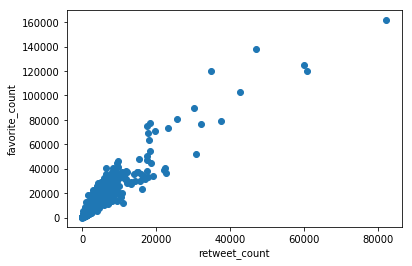

In [56]:
plt.scatter(df_copy['retweet_count'],df_copy['favorite_count'])
plt.xlabel('retweet_count')
plt.ylabel('favorite_count')

It was interesting to compare if the amount of retweets would corrolate to the amount of favorites a post gets. From the scatter plot above it is clear that there is a positive correlation between retweet_count and favorite_count; the more retweets the more favorites. 

### Insight 3 

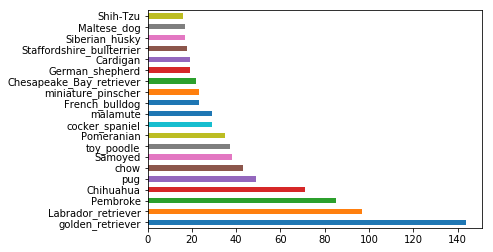

In [57]:
df_copy['p1'].value_counts()[:20].plot(kind='barh')

This insight is useful to find which breed is the most popular based on the predictions for what breed the dog is in the image.  